<a href="https://colab.research.google.com/github/SelvamathanS/Lstm/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing Data (MNIST)***

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import  Input, Model
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

#preprocessing (normalizing(0 to 1) and reshaping the data too 3d for lstm only accepts the image data in 3d format)
train_images = x_train.reshape((60000,28,28)).astype('float32')/255
test_images = x_test.reshape((10000,28,28)).astype('float32')/255

#one hot encoding for easily calculating losses
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

# ***Model training***

Diff btw sequensial model and lstm below code

In [ ]:
#it is called functional api (withoit using sequencial model)
input_shape  = (28,28)
inputs = Input(shape = input_shape)
rnn_layer = LSTM(128)(inputs)
outputs = Dense(10,activation = 'softmax')(rnn_layer)
model = Model(inputs=inputs,outputs=outputs)

In [ ]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │        80,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,674 (319.04 KB)

 Trainable params: 81,674 (319.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 38ms/step - accuracy: 0.7798 - loss: 0.6601 - val_accuracy: 0.9652 - val_loss: 0.1093
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9673 - loss: 0.1092 - val_accuracy: 0.9780 - val_loss: 0.0719
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9788 - loss: 0.0700 - val_accuracy: 0.9835 - val_loss: 0.0531
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9837 - loss: 0.0524 - val_accuracy: 0.9865 - val_loss: 0.0459
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9877 - loss: 0.0411 - val_accuracy: 0.9852 - val_loss: 0.0480


## ***Evaluation***

In [ ]:
loss,accuracy = model.evaluate(test_images,test_labels)
print("Loss: " , loss)
print("Accuracy : ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9815 - loss: 0.0563
Loss:  0.04803935065865517
Accuracy :  0.9851999878883362


# ***Visualization***

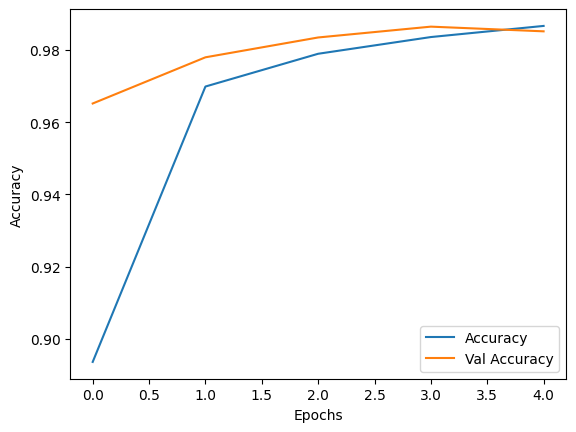

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

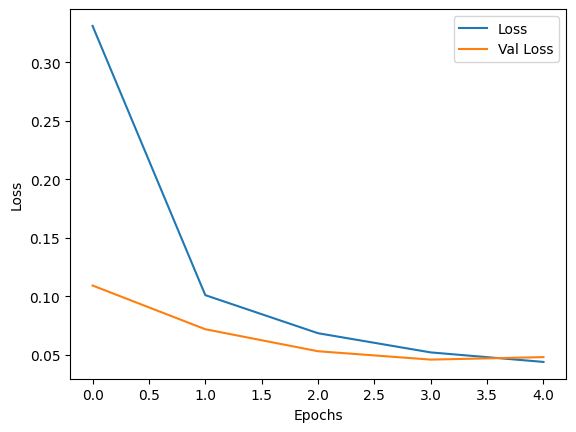

In [ ]:
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ***Prediction***

In [ ]:
y_pred = model.predict(test_images[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


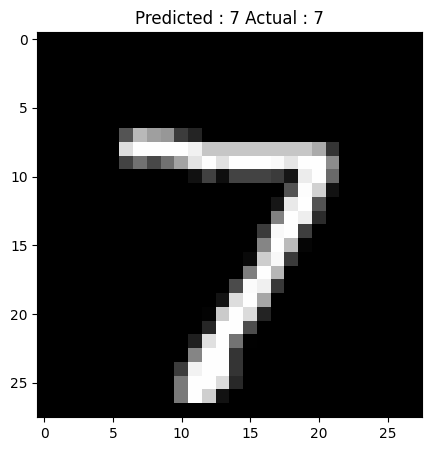

In [ ]:
import numpy as np
class_names = [str(i) for i in range(10)]
y_pred1=np.argmax(y_pred,axis=1)

image_index = 0 # Consistent index for prediction and display

plt.figure(figsize=(5,5))
plt.imshow(x_test[image_index],cmap='gray')

predicted_label = y_pred1[0] # Prediction for the first image (index 0)
actual_label = y_test[image_index] # Actual label for the first image (index 0)

plt.title(f'Predicted : {class_names[predicted_label]} Actual : {class_names[actual_label]}')
plt.show()